# 3. 🌐 Python to Acess Web Data

## 11.1 Regular Expressions
- AKA `regex`, `regexp` provides concise & flexivle way for matching strings of text 
- Smart & powerful way of searching thru lots of text
- Don't have to write as code much but harder to learn
- Instead of programming w lines, program w characters 

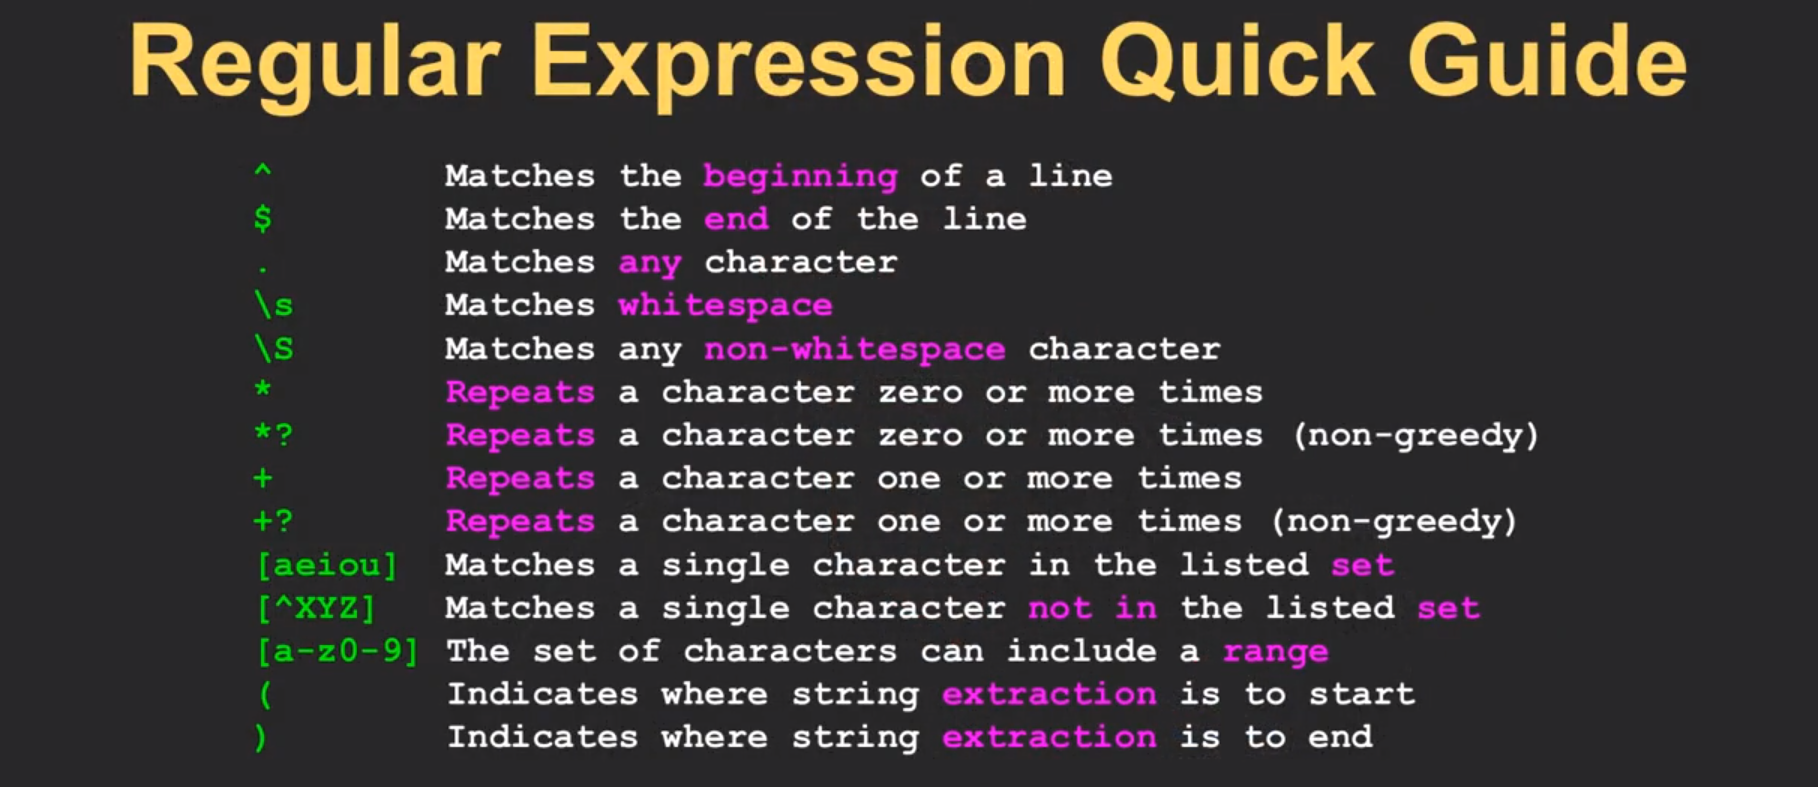
- Must import regexp using `import re`
- `re.search()` to see if string matches a regexp, similar to `find()`
- `re.findall()` to extract portions of a string that match regexp, similar to combo of `find()` & slicing: `var[5:10]`

### Using `re.search()` like `find()`

In [ ]:
# find() method:
hand = open('mbox-short.txt')
for line in hand: # iterates thru entire text line by line
    line = line.rstrip() 
    if line.find('From:') >= 0: # e.g. not -1 & From: is found:
        print(line)

In [ ]:
# re.search() method:
# characters not used in this case
# would prolly not use regexp for smth this simple

import re 

hand = open('mbox-short.txt')
for line in hand:
    line = line.rstrip()
    if re.search('From:', line): # returns T/F if match found
        print(line)

### Using `re.search` Like `startswith()`


In [ ]:
# startswith() method:
hand = open('mbox-short.txt')
for line in hand: # iterates thru entire text line by line
    line = line.rstrip() 
    if line.startswith('From:'): # e.g. not -1 & From: is found:
        print(line)

In [ ]:
# re.search method:
import re

hand = open('mbox-short.txt')
for line in hand:
    line = line.rstrip()
    if re.search('^From:', line): 
        print(line)
        
# tweak matching string by adding special character (^)
# says u want 'F' as beginning of line -> returns T/F

### Wild-Card Characters 

`^X.*:`
- Translates to looking for str startswith X, followed by any number of characters, then ending w colon

What each char means:
- `^` indicates startswith 
- `.` matches any character 
- `*` indicates 0 or more repeats 

Will match following `strings`:
- `X-Sieve:` CMU Sieve 2.3
- `X-DSPAM-Result:` Innocent

### Fine-Tuning the match
`^X.*:`
- will match `X-Plane is behing schedule:` two weeks
- When we don't want it to match

Can do `X-\S+:`
- `\S` matches any non-space character 
- `+` one or more times (>= 1) 
- will no longer match: 

X-Plane is behing schedule: two weeks

## 11.2 Extracting Data from Regexp
- re.search() only returns T/F for match or no match
- If want to `extract` string, use `re.findall`

In [8]:
import re
x = 'My 2 favorite numbers are 19 and 42'
y = re.findall('[0-9]+', x)
print(y)

# [0-9]+ indicates 1 or more digits 
# without the + it would be 1 digit only
# Don't have to do split, for loop, much quicker 
# Outputs as STRINGS not INTS in a list 

['2', '19', '42']


When using re.findall(), it returns a list of zero or more sub-strings that match regexp 

In [11]:
import re
x = 'My 2 favorite numbers are 19 and 42'
y = re.findall('[AEIOU]+', x) # 1 or more uppercase vowel
print(y)
# no uppercase vowels, so empty list 

[]


### Warning: `Greedy` Matching
- The `repeat` characters (`*` & `+`) push `outward` in both directions (greedy) 
- <span style='color:orange'>Prefers the largest possible string</span>


In [14]:
import re 
x = 'From: Using the : character'
y = re.findall('^F.+:', x)
print(y)

# Notice how there's 2 colons and both r matched 
# Can think of * and + as very pushy n greedy
# They want the largest possible string 

['From: Using the :']


### `Non-Greedy` Matching
- If you add a `?` character before the colon, the + and * chill out a bit
- Think of `?` as don't be greedy (<span style='color:greenyellow'>chooses the shortest string`</span>)

In [17]:
import re 
x = 'From: Using the : character'
y = re.findall('^F.+?:', x)
print(y)


['From:']


### Fine-Tuning String Extracting
- Can refine match for `re.findall()` & separately determine which portion of match is to be extracted using paratheses

In [22]:
x = 'From stephen.marquard@uct.ac.za Sat Jan 5 09:14:16 2008'

y = re.findall('\S+@\S+', x)
print(y)
# look at cheatsheet \S is any non-blank character (i.e. not a whitespace)
# The + added to repeat as many times 

# It finds the @ but pushes outwards of non-blank characters 
# Without greediness u only get 'd@u'

['stephen.marquard@uct.ac.za']


### Parantheses to Fine-Tune
- Parentheses are not part of the match but they tell where to `start` & `stop` what string to extract 

In [39]:
x = 'From stephen.marquard@uct.ac.za Sat Jan 5 09:14:16 2008'

y = re.findall('\S+@\S+', x)
print(y)

y = re.findall('^From (\S+@\S+)', x)
print(y)
# From is part of the match but you are not extracting it 
# Only extracting part in parentheses 
# Can be used to fine-tune what to extract 
# E.g. only extract if has prefix From space 

['stephen.marquard@uct.ac.za']
['stephen.marquard@uct.ac.za']


In [28]:
# Remember when we wanted to get uct.ac.za 
# we had to use a double split pattern 
# Using Regex is less code
import re

x = 'From stephen.marquard@uct.ac.za Sat Jan 5 09:14:16 2008'
y = re.findall('@([^ ]*)', x)
print(y)

['uct.ac.za']


`@([^ ])*)`
- `@( )` finds @ and extract things in brackets
- `[^ ]` matches non-blank character
    - anything after ^ is match everything `BUT`
        - so here it matches everything but space
- `*` match many of them

In [29]:
import re

x = 'From stephen.marquard@uct.ac.za Sat Jan 5 09:14:16 2008'
y = re.findall('^From .*@([^ ]*)', x)
print(y)

['uct.ac.za']


- Adding `^From .*` fine-tunes this
- `^From` asks to match with anything starting with From
- ` [space].*@` asks to match with anything with a space after From and any number of character until @


### Example Regex Extracting


In [30]:
import re 
hand = open('mbox-short.txt')
numlist = list()
for line in hand:
    line = line.rstrip()
    stuff = re.findall('^X-DSPAM-Confidence: ([0-9.]+)', line) # 1.
    if len(stuff) != 1: continue  # 2.

    num = float(stuff[0]) # 3.
    numlist.append(num) # 4.
print('Maximum:', max(numlist))

# 1. ^X-DSPAM-Confidence: ([0-9.]+)
    # start extracting in brackets ( )
    # take any digits incl. period [0-9.]
    # one or more times (+)

# 2. line we're looking for should only have 1 extraction (floating num) in a list 
# 3. converts num from string to float
# 4. adds it to the list 

Maximum: 0.9907


### Escape Character 
- if u want a regular exp character to behave `normally` prefix with `'\'`

In [32]:
import re 
x = 'We just got $10.00 for cookies.'
y = re.findall('\$[0-9.]+', x)
print(y)

['$10.00']


- `\$` search for text starting w/ $
- `[0-9.]` look for digit or period 
- `+` At least one or more

Try to see what this matches w/o running:

In [1]:
import re

x = 'From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008'
y = re.findall('\S+?@\S+', x)

print(y)

['stephen.marquard@uct.ac.za']


***

## Assignment: Extracting Data With Regexp

***

## 12.1 Networked Tech

### Sockets in Python
Python has built-in support for TCP Sockets

In [3]:
import socket
mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect( ('data.pr4e.org', 80))
#                 ^HOST           ^ PORT 80

## 12.2 Hypertext Transfer Protocol (HTTP)

### <span style=color:orange>What is a protocol</span>
- Set of rules that all parties follow so we can predict each other's behaviour
- And not bump into each other

<span style='color:orange'>Since Python gives us a reliable `socket`, what do we want to do with it?</span>
- Application Protocols (different rules depending on app)
    - mail
    - world wide web
- HTTP
    - dominant App Layer Protocol on the Internet 
    - Invented for the Web to Retrieve HTML, Imgs, Docs, etc.
    - Extended to be data in addition to docs - RSS, Web Services, etc. 
        - Basic Concept - Make a Connection - Request a doc - Retrieve the Doc - Close the Connection

<span style='color:orange'>HTTP is a set of rules to allow browsers to retrieve web docs from servers over the Internet</span>

<span style='color:yellowgreen'>http://</span><span style='color:magenta'>www.dr-chuck.com</span><span style='color:orange'>/page1.htm</span>

- <span style='color:yellowgreen'>protocol
- <span style='color:magenta'>host
- <span style='color:orange'>document

### <span style='color:greenyellow'>Getting Data From The Server</span>
- Each time user clicks on tag w `href=` value to switch to a new page, the browser makes a connection to the web server & issues a `GET` request - to GET the content of the page at specified URL
- The server returns the HTML doc to the browser which formats & displays the doc to the user

### <span style='color:orange'>Request Response Cycle:
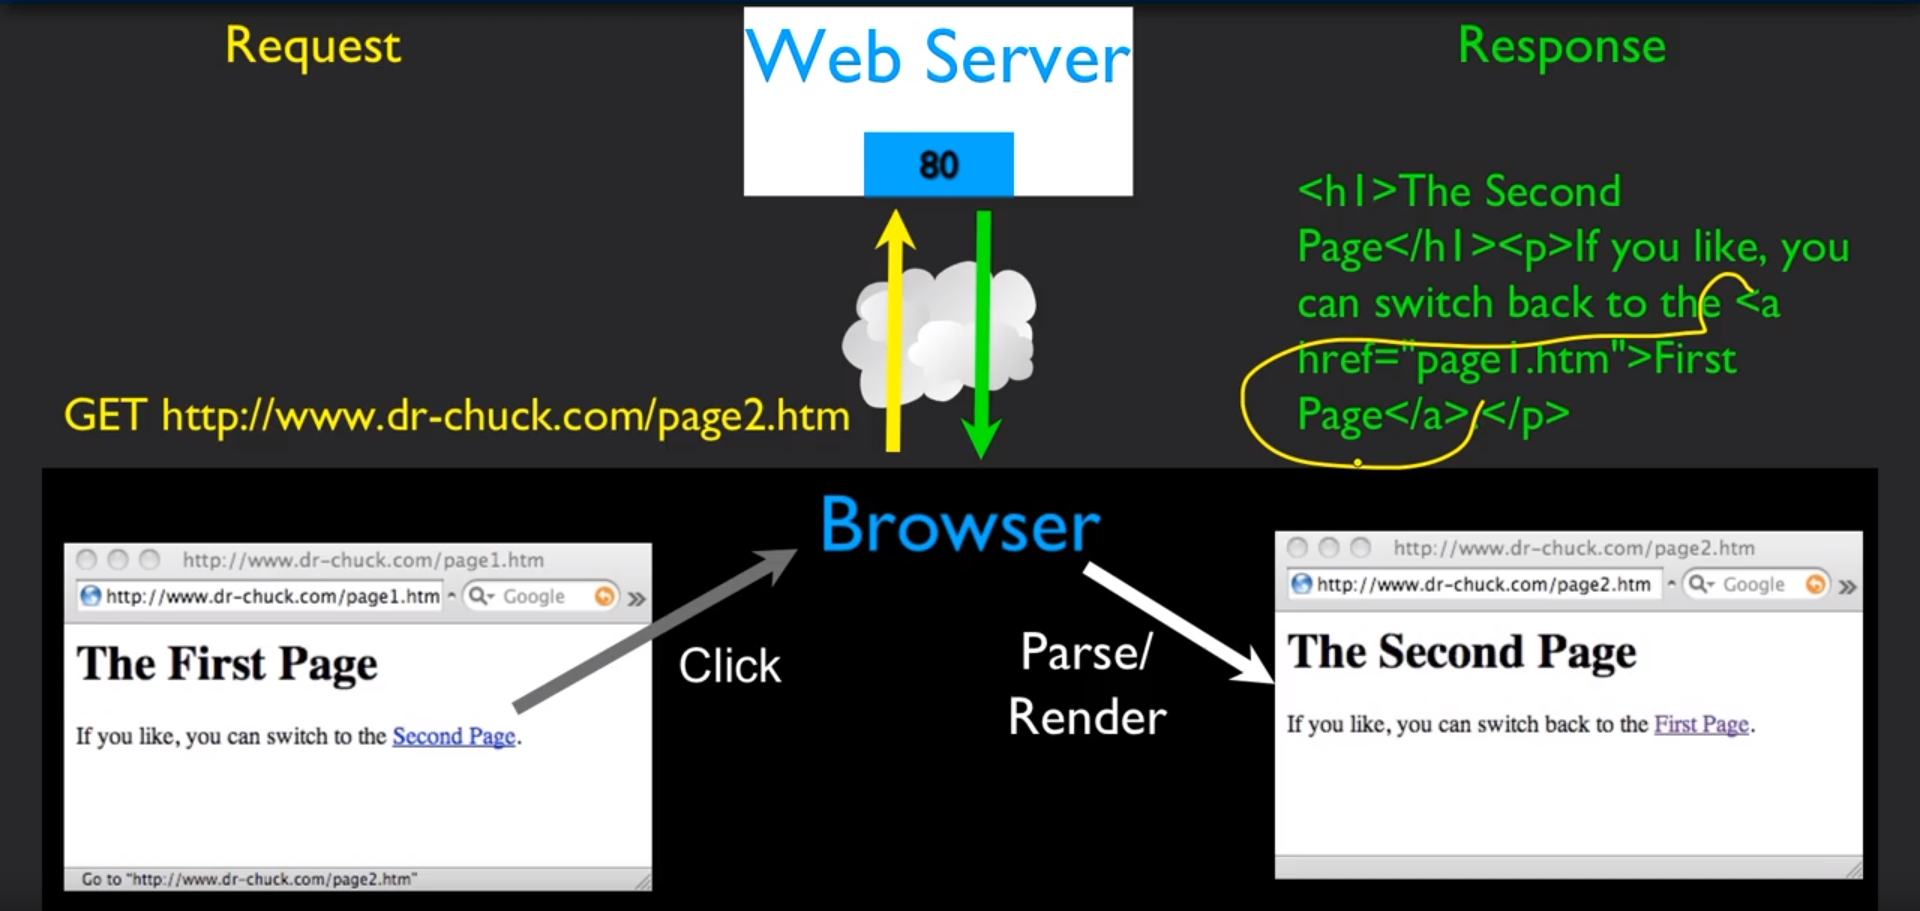


- Click on link 
- Browser looks at HTML to say what web server + port to connect to and doc to retrieve 
- Browser makes socket connection to port 80 & sends it <span style='color:yellow'>request</span>
- Web Server decodes request to send <span style='color:greenyellow'>response</span> as HTML
    - `<h1>` - header 1
    - `<p>` - start of paragraph
    - `<a>` - anchor for href clickable text
- Browser reads response & makes page showup

### `A HTTP Request in Python`
TLDR make a request, get data back

In [7]:
import socket

mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM) # makes doorway but not yet connected to anything 
mysock.connect(('data.pr4e.org', 80)) # attempts connect to port 80 & establish socket connected to web server
cmd = 'GET http://data.pr4e.org/romeo.txt HTTP/1.0\r\n\r\n'.encode() # sends request, encode converts unicode to UTF-8 that we'll send
mysock.send(cmd) # send to server

while True: 
    data = mysock.recv(512) # receive up to 512 chrs
    if (len(data) < 1): # if we get no data, stop loop
        break
    print(data.decode()) # if get data, decode
mysock.close() # close socket


HTTP/1.1 200 OK
Date: Fri, 08 Dec 2023 23:18:37 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Sat, 13 May 2017 11:22:22 GMT
ETag: "a7-54f6609245537"
Accept-Ranges: bytes
Content-Length: 167
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Connection: close
Content-Type: text/plain

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already s
ick and pale with grief



### Using the Developer Console to Explore HTTP

Can find various things about <span style='color:orange'>request response cycle</span>
- On the Brave Browser, Go to settings -> more tools -> developer tools `(or ctrl + shift + i)`
- Try it with this link: https://www.dr-chuck.com/page1.html
    - Try looking under the `network` tab

## Graded: Understanding the Request/Response Cycle

## 12.3 Unicode Characters & Strings

How do computers know the difference b/w `H` and `h`?
- had to come up with a mapping b/w numbers & letters
- E.g. ASCII: 
    - `H` is 73
    - `h` is 104

### <span style='color:orange'> Representing Simple Strings </span>
- Each chr is represented by a num b/w 0-256 stored in 8 bits of memory
- We refer to '8 bits of memory' as a <span style='color:yellowgreen'> **byte**</span> 
- The `ord()` function tells us the numeric value of a simple ASCII character

In [22]:
print(ord('H'))
print(ord('h'))
# explains why h > H in python

print('h' > 'H')

72
104
True


Way back American computers couldn't talk to Japanese computers bc they had Asian characters 
- That's why `unicode` was invented
    - Has <span style='color:red'>**wayy**</span> more characters than ASCII which only has 128

First thing we tried was:
#### <span style='color:orange'>Multi-Byte Characters</span>
- UTF-16 - fixed length - 2 bytes
- UTF-32 - fixed length - 4 bytes - (4 times as much data for single char; not efficient)
- <span style='color:yellowgreen'>**UTF-8**</span> - 1-4 bytes
    - Automatic detection b/w ASCII & UTF-8
    - <span style='color:yellowgreen'>UTF-8 is recommended practice for encoding data to be exchanged b/w systems

In [21]:
unicode = u'食べ物'
print(type(unicode)) # unicode is type str

byte = b'abc'
print(type(byte)) # but byte str & regular str diff

# Byte is raw, unencoded 
# Could be UTF-8, UTF-16, ASCII, don't know its encoding 
# Have to manage this when dealing w outside data

<class 'str'>
<class 'bytes'>


#### Python 3 & Unicode
In Python 3, all str internally are `UNICODE` not ASCII or UTF
- Bc of this, working w str variables in Python programs & reading data from files usually 'just works'
- BUT now when we talk to a network resource using sockets or talk to a database, <span style='color:orange'>we have to encode & decode data (usually to UTF-8)</span>

#### Python Strings to Bytes 

`ENCODING (unicode -> bytes encoded as UTF-8)`

- Since we send bytes when talking to external resouce (e.g. network socket), we need to encode Python 3 strings which are unicode into bytes

In [1]:
import socket 

mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)  
mysock.connect(('data.pr4e.org', 80))
cmd = 'GET http://data.pr4e.org/romeo.txt HTTP/1.0\r\n\r\n'.encode() # take this str, make into bytes encoded in UTF-8 (default)
mysock.send(cmd) # send as bytes

47

`DECODING (bytes -> unicode)`

 When we read data from external resource, we must decode it based on the character set (e.g. UTF-8, ASCII) so it's represented in Python 3 as string

In [2]:
# This is why we need a decode operation (Bytes -> Unicode)
while True:
    data = mysock.recv(512) # This is a BYTE
    if ( len(data) < 1) :
        break
    mystring = data.decode()  # This becomes UNICODE
    print(mystring)

# Can put character set inside .decode() argument (line 6) but it assumes UTF-8 or ASCII (both backwards compatible w/ each other)
# Very rare you'll get smth other than UTF-8 or ASCII
# By the end of this decoding, it'll be a string

HTTP/1.1 200 OK
Date: Thu, 04 Jan 2024 09:52:57 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Sat, 13 May 2017 11:22:22 GMT
ETag: "a7-54f6609245537"
Accept-Ranges: bytes
Content-Length: 167
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Connection: close
Content-Type: text/plain

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already s
ick and pale with grief



![encode decode.png](<attachment:encode decode.png>)
Sounds more confusing than it is - this is the jist of it:

Before sending 
- `encode()` - from `String (Unicode)` -> to `Bytes (UTF-8)`
- send() as bytes

Receiving back
- revc() as bytes 
- `decode()` from `Bytes` -> to `String (Unicode)`

Think of as a barrier b/w inside & outside world
- Allows consistent inside data 
- So we can mix strings from various sources regardless of the character set of those strings
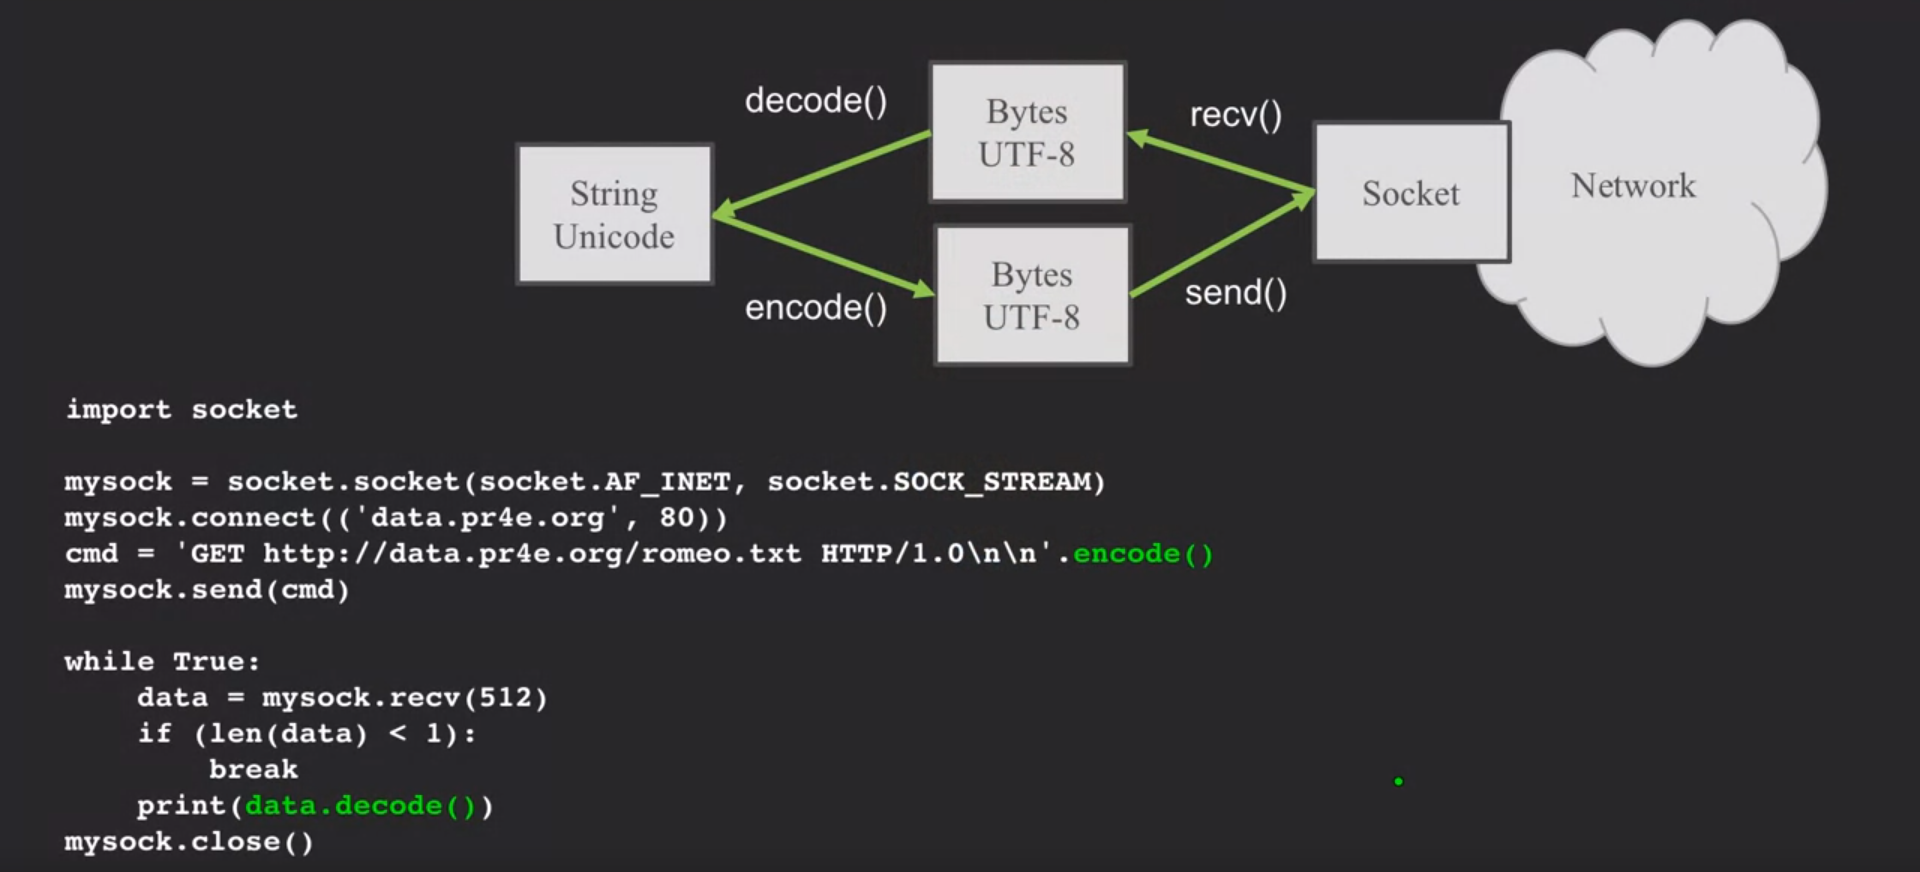

## 12.4 Retriving Web Pages

### Using `urllib` in Python
Since HTTP is so common, we have a library that does all the socket work for us and makes web pages look like a file
- <span style='color:orange'>Only 4 lines of code!</span>

In [25]:
import urllib.request, urllib.parse, urllib.error

fhand = urllib.request.urlopen('http://data.pr4e.org/romeo.txt') # doesn't read data, remember, only makes the portal
for line in fhand: # iterates through all lines
    print(line.decode().strip()) # iteration is byte array, not string, need to decode



But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief


### Working with HTML files

In [3]:
import urllib.request, urllib.parse, urllib.error

fhand = urllib.request.urlopen('http://data.pr4e.org/romeo.txt')

counts = dict() # making a dictionary 
for line in fhand:
    words = line.decode().split()
    for word in words:
        counts[word] = counts.get(word, 0) + 1 # idiom counter
print(counts)

# identical to opening a file, reading all words & counting them like we've done before

{'But': 1, 'soft': 1, 'what': 1, 'light': 1, 'through': 1, 'yonder': 1, 'window': 1, 'breaks': 1, 'It': 1, 'is': 3, 'the': 3, 'east': 1, 'and': 3, 'Juliet': 1, 'sun': 2, 'Arise': 1, 'fair': 1, 'kill': 1, 'envious': 1, 'moon': 1, 'Who': 1, 'already': 1, 'sick': 1, 'pale': 1, 'with': 1, 'grief': 1}


### Reading Web Pages

In [33]:
import urllib.request, urllib.parse, urllib.error

fhand = urllib.request.urlopen('http://www.dr-chuck.com/page1.htm')
for line in fhand:
    print(line.decode().strip())

<h1>The First Page</h1>
<p>
If you like, you can switch to the
<a href="http://www.dr-chuck.com/page2.htm">
Second Page</a>.
</p>


## 12.5 Parsing Web Files

### <span style='color:orange'>What is Web Scraping</span>
- When a program or script pretends to be a browser & retrieves web pages, looks at those web pages, extracts info, and then looks at more web pages
- Search engines scrap web pages - we call this 'spidering the web' or 'web crawling'

#### <span style='color:orange'>Why Scrape?</span>
- Pull data - particiularly social data - who links to who?
- Monitor a site for new info
- Get your own data from some system that has no 'export capability'

#### <span style='color:orange'>Ethics</span>
- Some controversy about web page scraping and some sites are snippy bout it 
- Republishing copyrighted info is not allowed
- Violating ToS is not allowed
- Be careful what you scrape 
- If caught scrapping when u shouldn't 
    - Network, computer or ur account could be blocked

### `Beautiful Soup` - String Searching the Web Easy

<span style='color:orange'> Lots of syntax errors on html </span> (very hard to use `regexp`, `find`, `split`, etc. to parse the web)
- Someone has alr found all the variations since html is so flexible
- Use free software library called [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/)
 to make life easier 

### BeautifulSoup Installation 

In [5]:
# WAY 1
# Run line 2 below to install BeautifulSoup for all python programs on your computer 
# pip install beautifulsoup4

# WAY 2
# Or download the file:
# http://www.py4e.com/code3/bs4.zip
# unzip it in the same directory as the file you run code on 
# useful when on campus computer and can't install software

import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
# import should work if installed correctly 

### Example: Retrieving Anchor Tags (href links)

In [15]:
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup

url = input('Just Press Enter Only') 
if len(url) < 1: url =  'http://www.dr-chuck.com/page1.htm'
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html, 'html.parser') 

tags = soup('a') 
for tag in tags:
    print(tag.get('href', None)) 

# Much easier than using regex or other methods 

http://www.dr-chuck.com/page2.htm


- <span style='color:cyan'>'html.parser'</span> tells BS to clean the html file and make an object (line 7)
    - Can assign the object anything like 'soup' (line 8)
- Now you ask BeautifulSoup some questions:
    - Retriving a list of all anchor tags (line 9)
    - Using get(), retrieve href, if none, return None (line 11)

***

## Graded: Scraping HTML Data with BeautifulSoup

111

## Assignment: Following Links in HTML Using BeautifulSoup

***

## 13.1 Data on the Web

![wire format.png](<attachment:wire format.png>)
`XML` is an agreed <span style='color:orange'> intermediate protocol</span> (AKA Wire Format) from sending python data to the web 
- Changing python data to XML is called `Serialize`
- Changing XML to a new language on web (e.g. Java) is called `De-Serialize`

Two `Serialisation types` we'll discuss are `XML` and `JSON`
- JSON considered newer, less complex & lighter weight
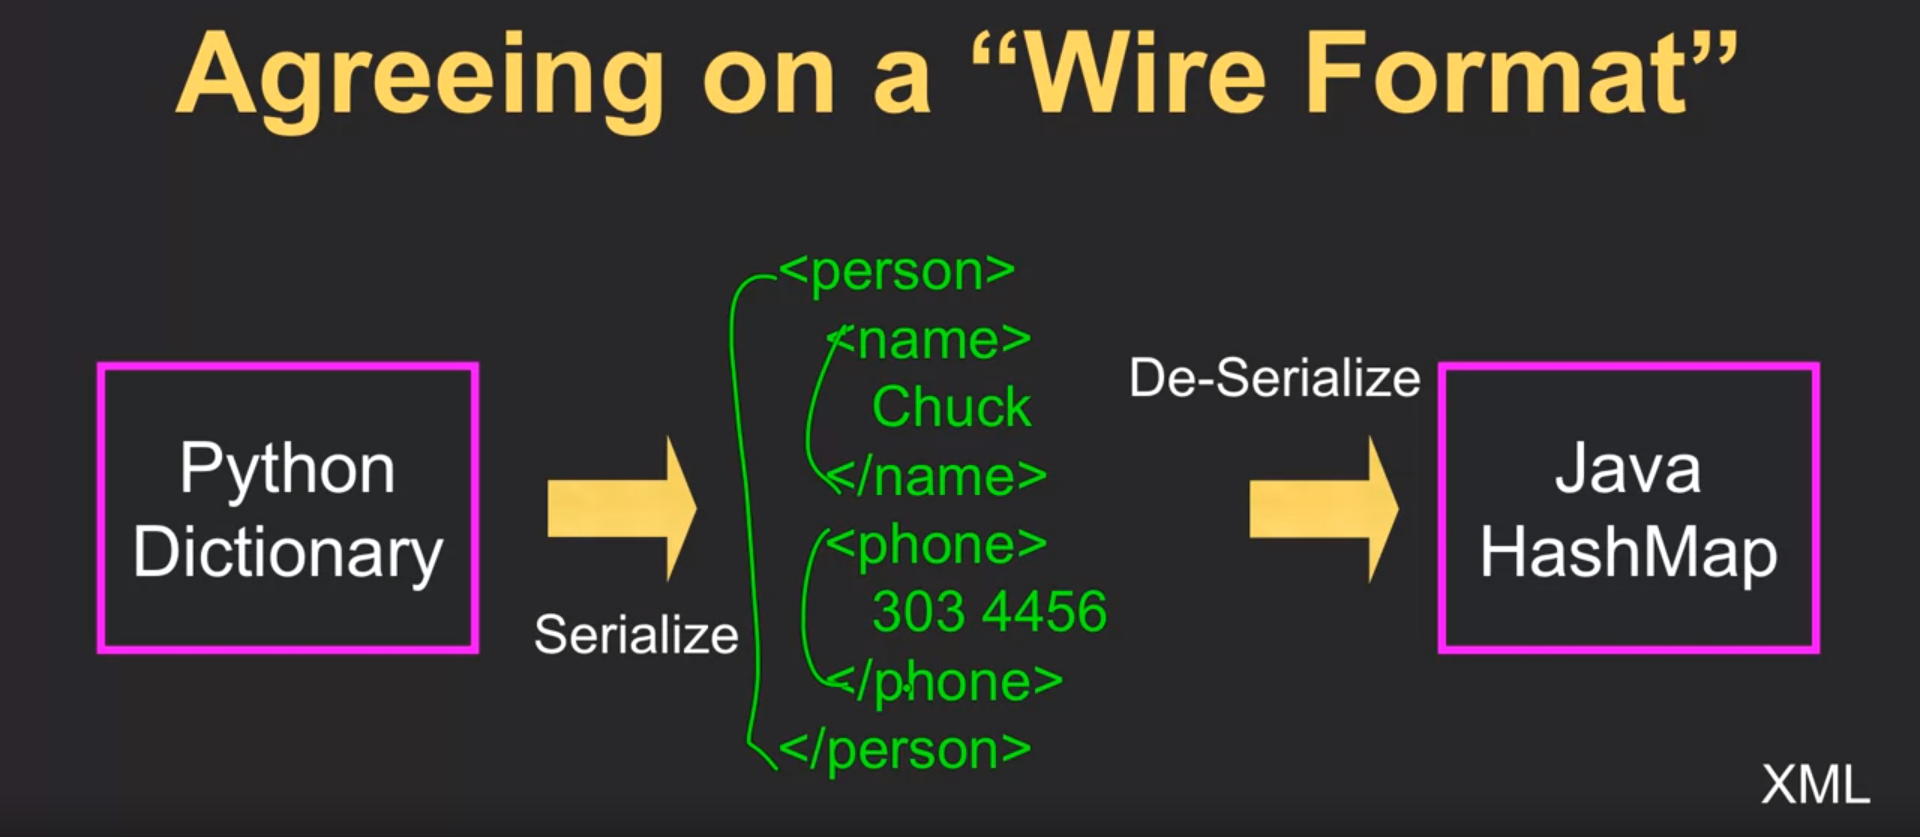

## 13.2 eXtensible Markup Language (`XML`)

![XML example.png](<attachment:XML example.png>)
XML uses `start tags: (<) `  &  ` end tags: (/>)`
- <span style='color:yellow'>Simple elements</span>/nodes are just with text in b/w
- <span style='color:magenta'>Complex elements</span> have other elements in them

XML does not care about indenting or whitespace but makes it easier to read
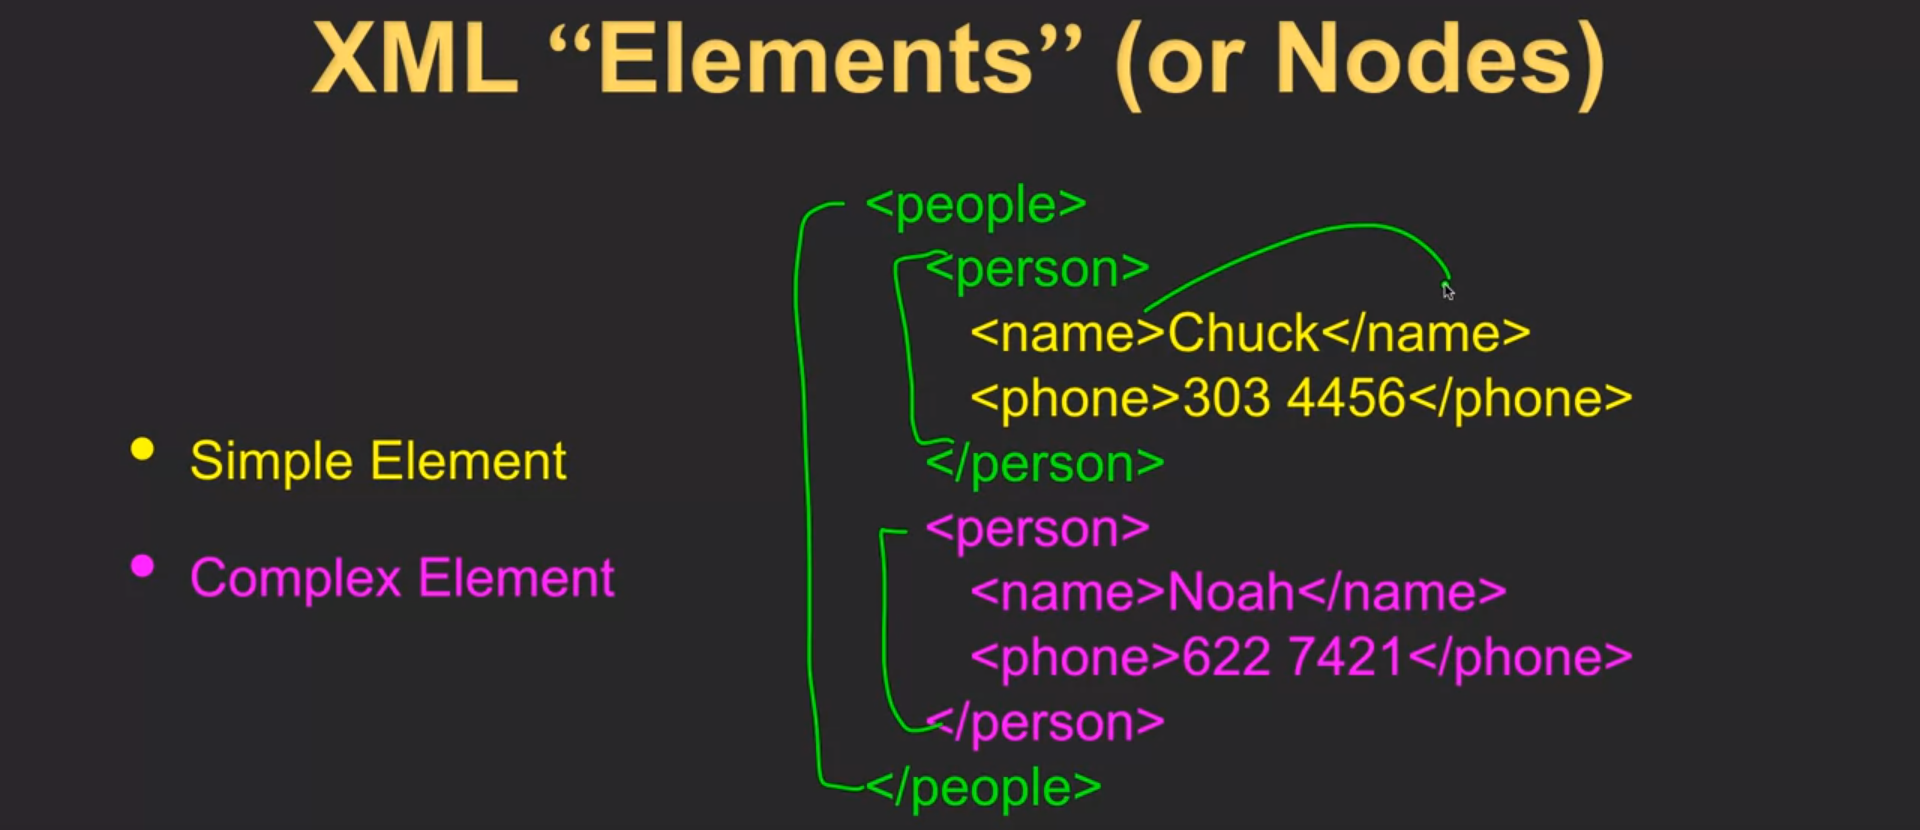

### XML Basics

![XML Basics.png](<attachment:XML Basics.png>)
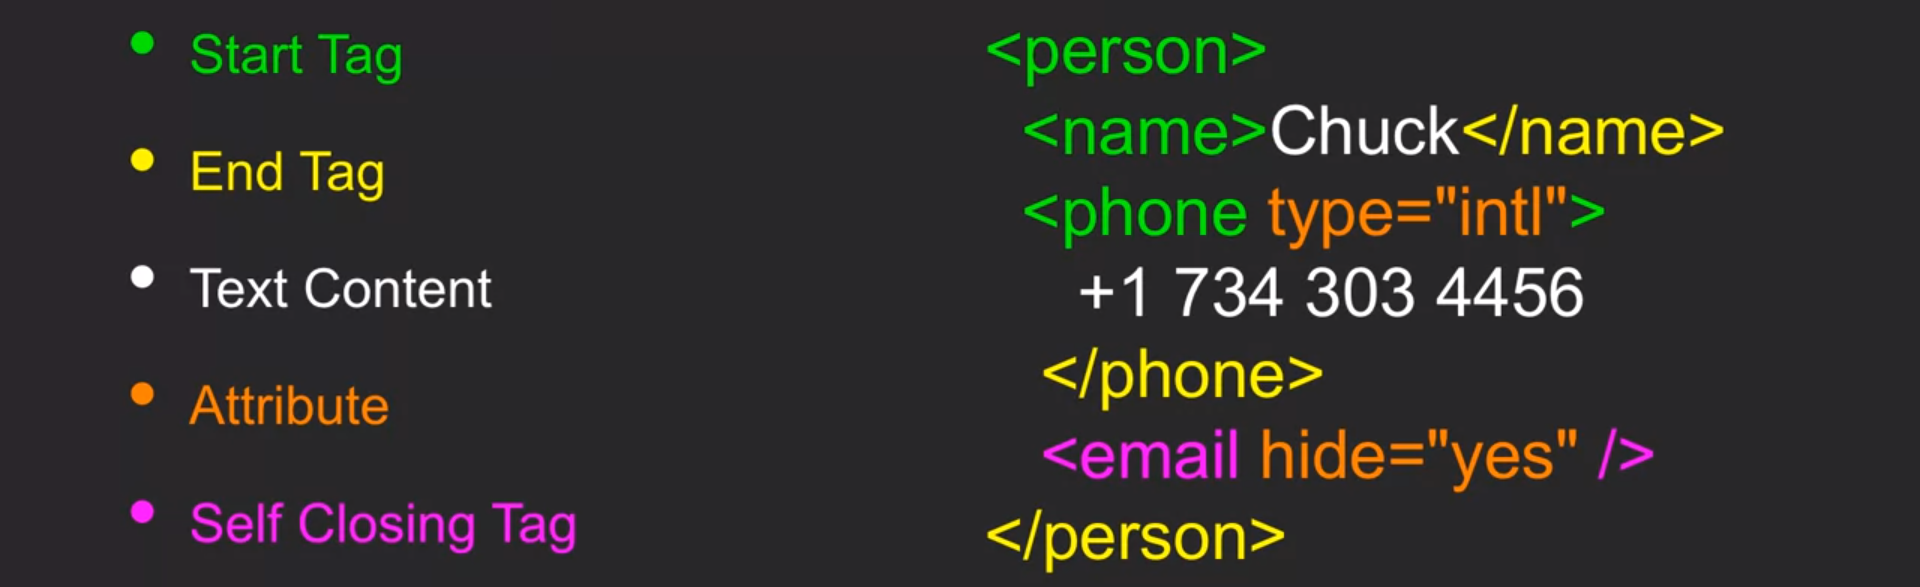

- Attributes are key-value pairs on the opening tag of XML

### XML as a Tree

![XML tree.png](<attachment:XML tree.png>)
Where the term `node` comes from
- `a` is the parent node
- `b` and `c` are child nodes
- Text in b/w is modelled as a <span style='color:magenta'>text node</span>
- Can be many <span style='color:yellowgreen'>attribute</span> childs (must have " ")

#### XML as a Path
Walk down the tree
- /a/b　→　<span style='color:magenta'>**X**</span>
- /a/c/d　→　<span style='color:magenta'>**Y**</span>
- /a/c/e　→　<span style='color:magenta'>**Z**</span>
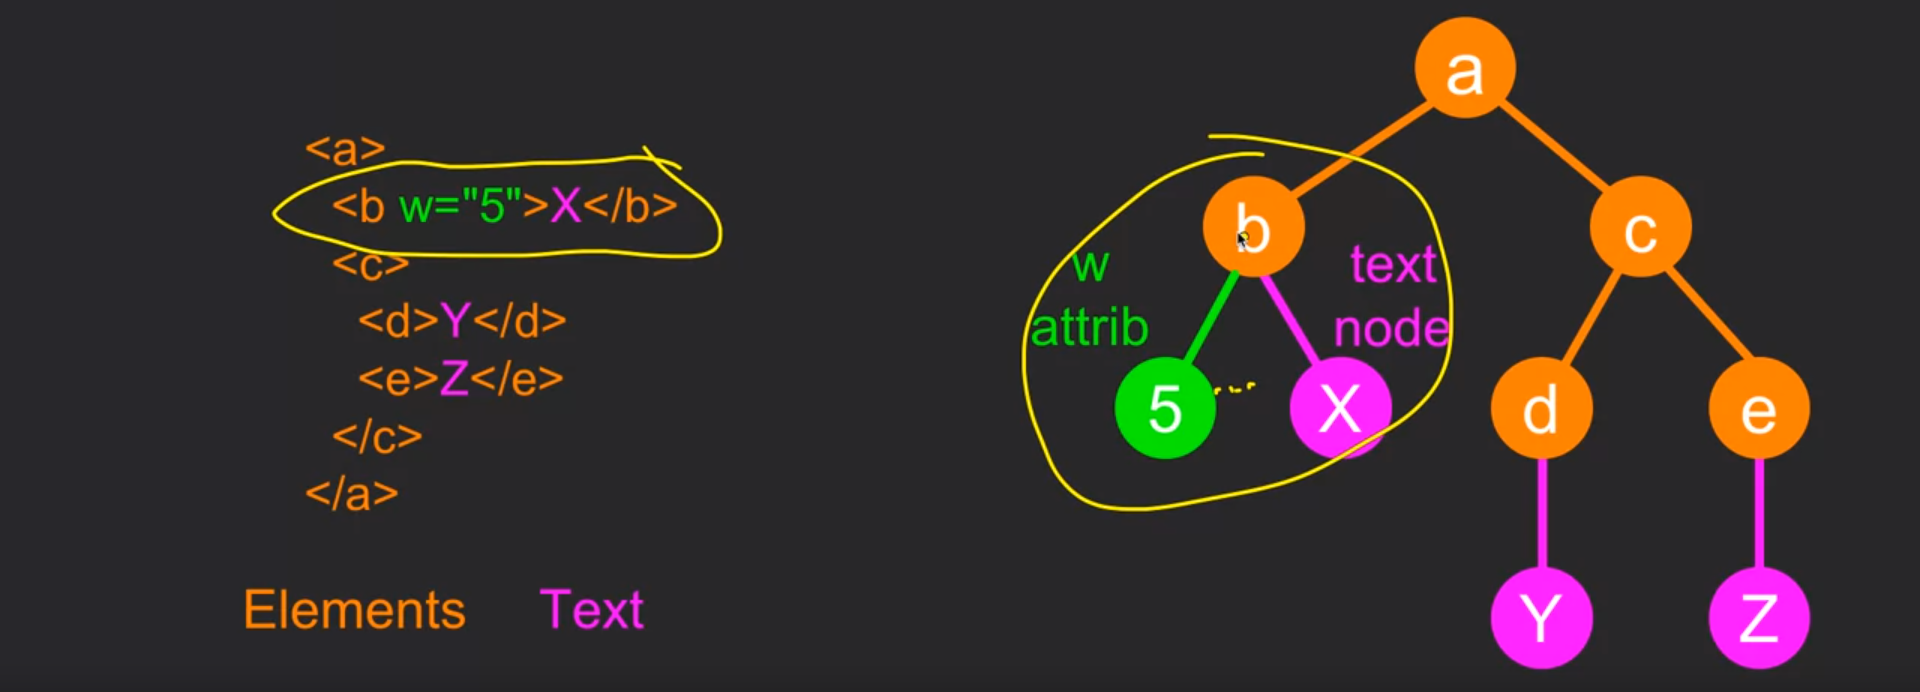

## 13.3 XML Schema

What is correct XML format?

### XML Validation
Send these to the <span style='color:magenta'>**Validator**</span>:
- <span style='color:yellow'>XML Document</span> 
- <span style='color:yellowgreen'>XML Schema Contract</span>
    - XML document itself which states what attribute names are expected and what data types are allowed


### `XSD` Most Common XML Schema Language 

![XSD Constrains.png](<attachment:XSD Constrains.png>)
- complex elements can have child nodes
- element names can be constrained
- minOccurs, maxOccurs constrains num of elements 

### XSD Data Types
- <span style='color:magenta'> <xs:element name="customer"type="xs:**<u>string</u>**"/> </span>

- <span style='color:yellowgreen'> <xs:element name="start"type="xs:**<u>date</u>**"/> </span>

- <span style='color:orange'> <xs:element name="startdate"type="xs:**<u>dateTime</u>**"/> </span>

- <span style='color:yellow'> <xs:element name="prize"type="xs:**<u>decimal</u>**"/> </span>

- <span style='color:cyan'> <xs:element name="integer"type="xs:**<u>age</u>**"/> </span>

***

- Common to sort date as <span style='color:yellowgreen'>YYYY-MM-DD</span> based on significance
- dateTime is <span style='color:yellowgreen'>YYYY-MM-DD</span><span style='color:orange'><u>T</u>HH:MM:SS<u>Z</u></span>
    - T represents Time
    - Z represents Timezone - usually specified in UTC/GMT 
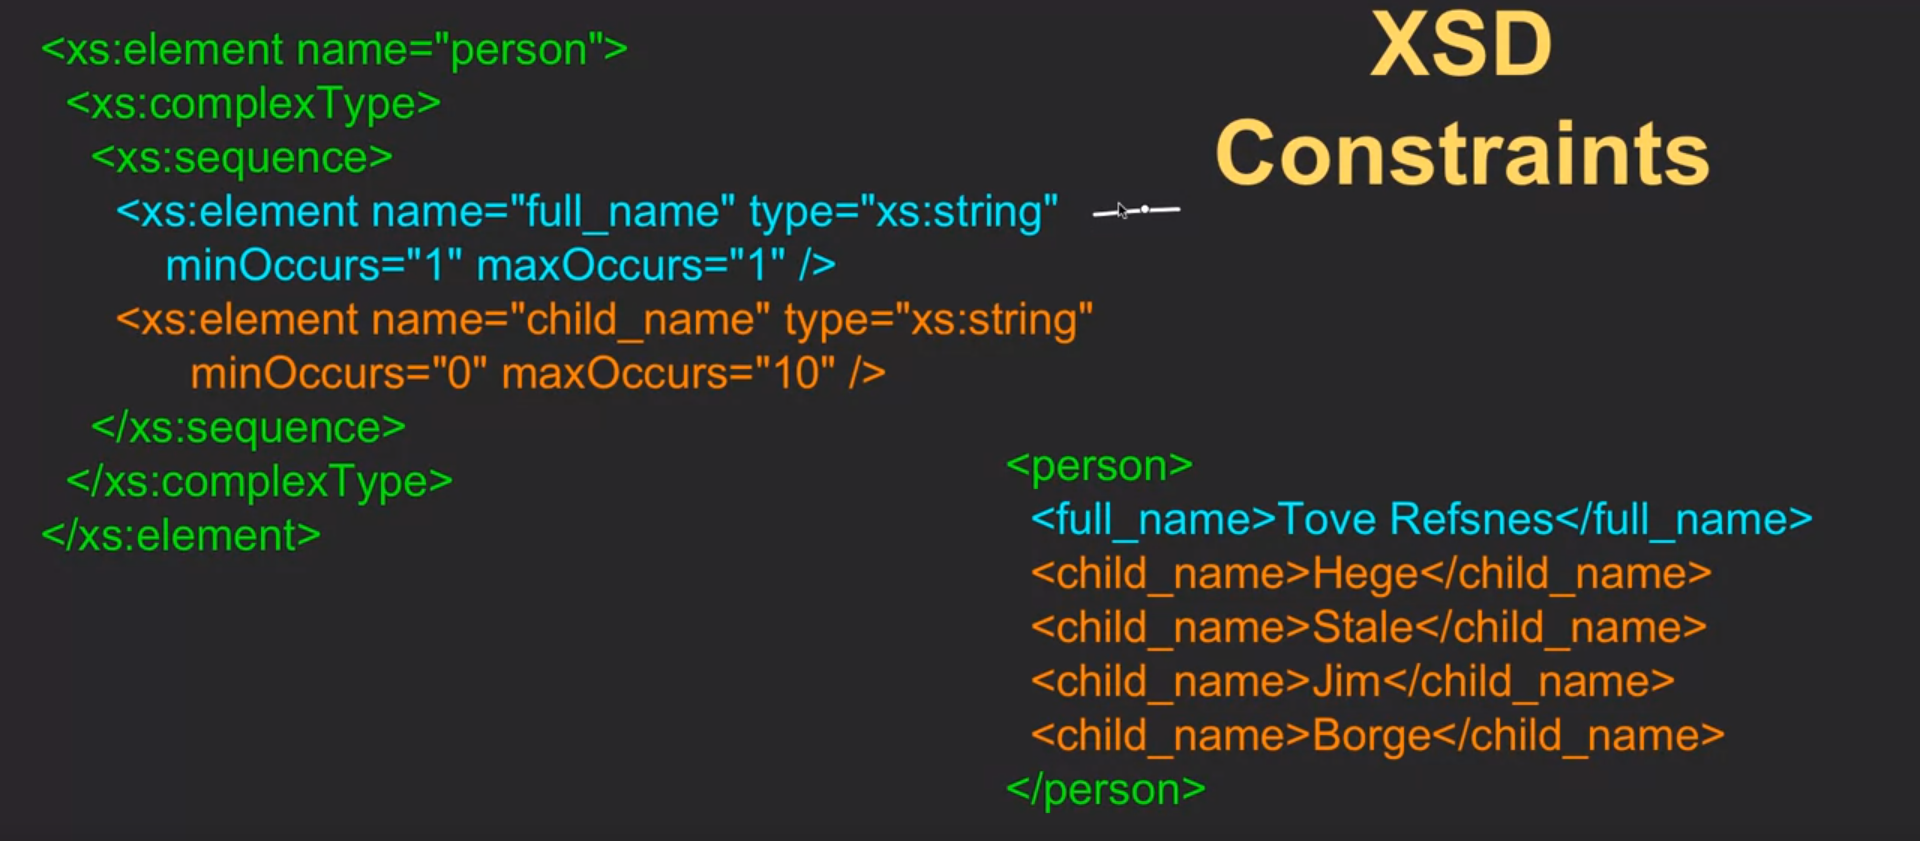

## 13.4 Parsing XML

In [ ]:
import xml.etree.ElementTree as ET
data = '''<person>                                  
    <name>Chuck</name> 
    <phone type="intl">
        +1 734 303 4456
    </phone>
    <email hide="yes"/>
</person>'''
#                                                                                     ET =
#                                                                                 p e r s o n 
# triple ''' quotes in python makes a multi-lined string                         /   |     \
# Makes a tree data structure from XML into a variable called ET              name   email  phone  
#                                                                            Chuck    hide   +1 734 202 4456
#                                                                                      yes
tree = ET.fromstring(data) # 1.
print('Name:',tree.find('name').text) # 2.
print('Attr:',tree.find('email').get('hide')) # 3.

# 1. fromstring() tells python to parse XML stored as string
# 2. finds text node under 'name' tag
# 3.  attribute 'hide' under 'email' tag

Name: Chuck
Attr: yes


In [2]:
import xml.etree.ElementTree as ET

input = '''
<stuff>
  <users>
    <user x="2">
      <id>001</id>
      <name>Chuck</name>
    </user>
    <user x="7">
      <id>009</id>
      <name>Brent</name>
    </user>
  </users>
</stuff>'''

stuff = ET.fromstring(input)
lst = stuff.findall('users/user') 
print('User count:', len(lst))

# stuff is a tree of info
# many different users with x value, ID and name 
# pass stuff into findall() to retrieve all user tags under users (users/user)
# makes a list of trees [↟ , ↟]

for item in lst:
    print('Name', item.find('name').text) 
    print('Id', item.find('id').text) 
    print('Attribute', item.get('x')) 

# iterate thru each user tree in list [↟ , ↟]
# find() to find name, id and x attribute 
# .text() to grab text inside tag 
# .get() to grab attribute under x

User count: 2
Name Chuck
Id 001
Attribute 2
Name Brent
Id 009
Attribute 7


***

## Graded: Extracting Data from XML

***

## 13.5 JavaScript Object Notation (`JSON`)

An alternative serialization format to `XML` 
- JSON considered easier than XML but less powerful
- JSON represents data as nested (similar to dictionary or lists)
    - Since JSON is similar to internal strcuture of python, easier to use

### JSON using dictionary structure

In [2]:
import json

data = '''
{
  "name" : "Chuck",
  "phone" : {
    "type" : "intl",
    "number" : "+1 734 303 4456"
   },
   "email" : {
     "hide" : "yes"
   }
}'''

# can think of as a tree similar to XML 
# unlike XML, no start/end tag & attribute 
# normally data imported w/ urllib

info = json.loads(data)
print('Name:', info["name"])
print('Hide:', info["email"]["hide"])

# loads() - load from string (json library)
# receive back a dictionary object
# use dict syntax - info["email"]["hide"] 
# hide is a dict inside the email dict

Name: Chuck
Hide: yes


### JSON using lists structure

In [3]:
import json

data = '''
[
  { "id" : "001",
    "x" : "2",
    "name" : "Chuck"
  } ,
  { "id" : "009",
    "x" : "7",
    "name" : "Brent"
  }
]'''

# makes a list of 2 dictionaries 
# note the square brackets [ ]

info = json.loads(data) 
print('User count:', len(info))

# name loaded data 'info' and pass to len 

for item in info:
    print('Name', item['name'])
    print('Id', item['id'])
    print('Attribute', item['x'])

# loop runs twice for each dictionary in the list 

User count: 2
Name Chuck
Id 001
Attribute 2
Name Brent
Id 009
Attribute 7


## 13.6 Service Oriented Approach

- Most non-trivial web applications use services from other applications
    - Credit Card Charge 
    - Hotel Reservation systems  
- Services publish the 'rules' applications must follow to make use of the service (<span style="color:orange">API</span>)

### <span style='color: yellowgreen'>Multiple Systems</span>
- Initially 2 systems cooperate and split the problem 
- As the data/service becomes useful - multiple applications want to use the information/application

[helpful video explaining this](https://www.coursera.org/learn/python-network-data/lecture/0CpCx/video-service-oriented-architectures)

## 13.7 Using Application Programming Interfaces (APIs)

![Geocoder API.png](<attachment:Geocoder API.png>)
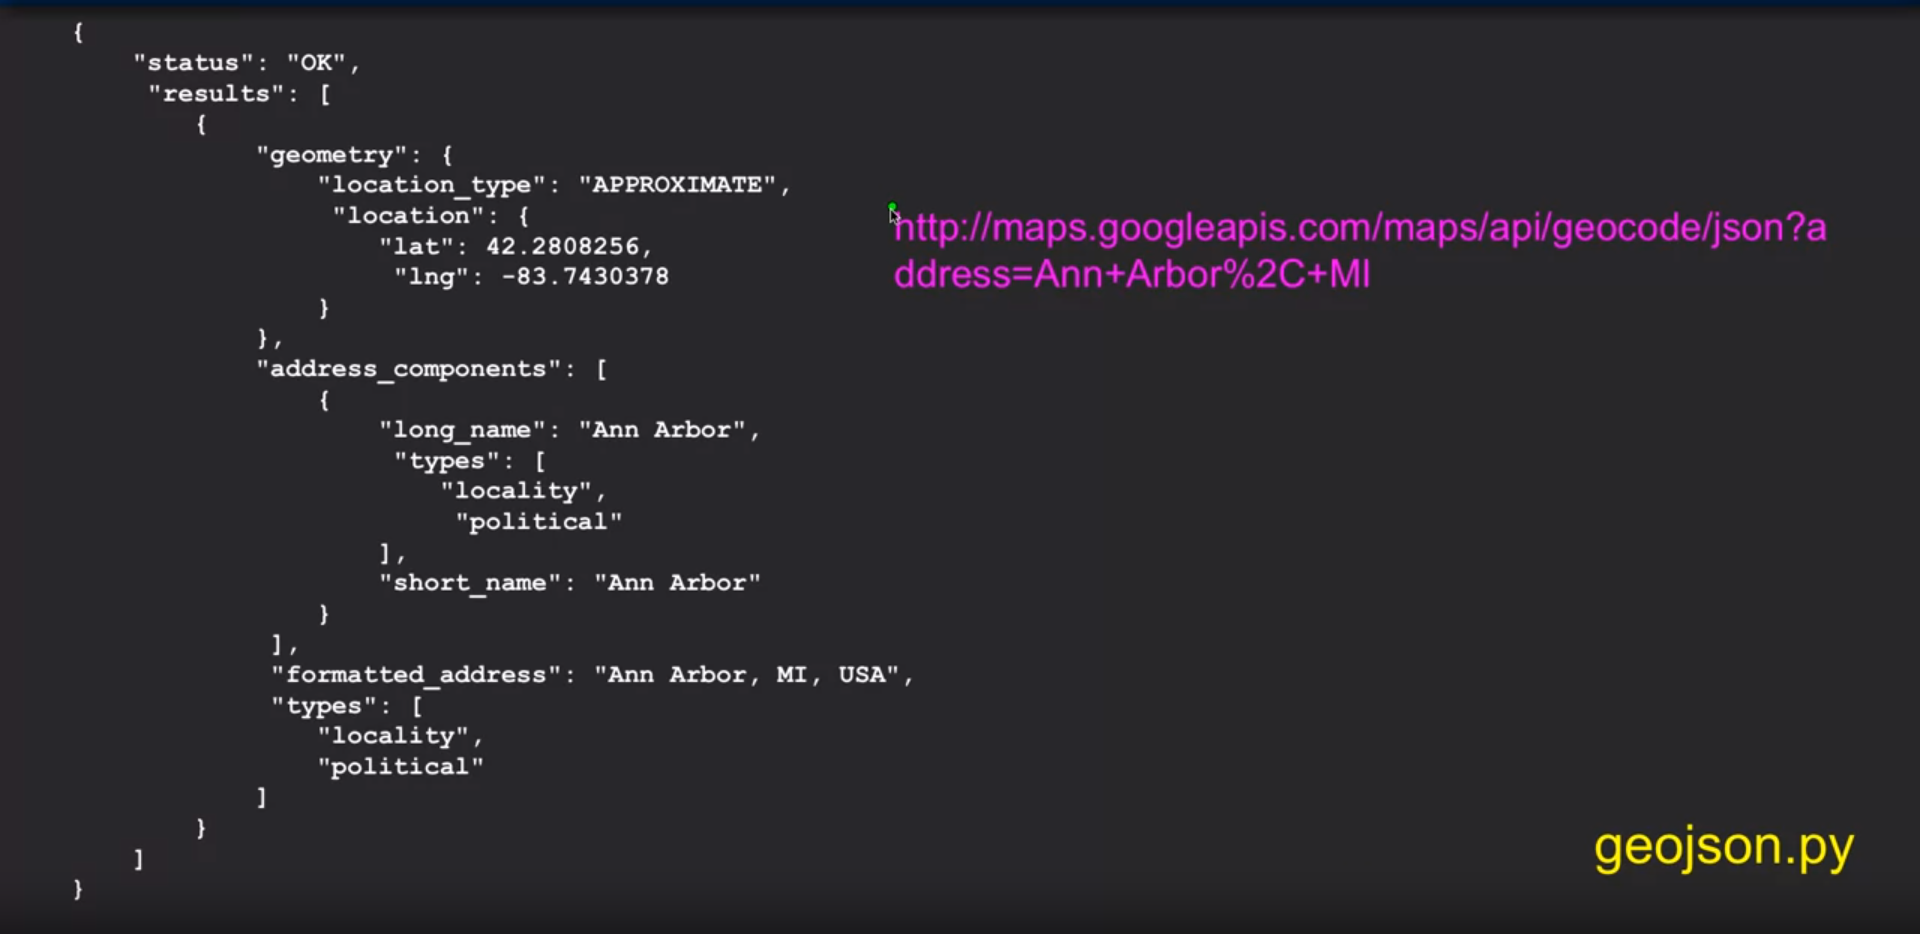

- Above is the json object returned when using geocode
    - Usually you'd look at documentation to know `rules` of using the API
        - After the `?` in url, enter address
        - `+` (space) 
        - `%C` (comma)
        - Ann+Arbor%C+MI = Ann Arbor, MI
    - Service now hidden behind API key
        - Used to be able to paste link to broswer to get the json
    
- Below is code used to extract info from this json (it's a bit confusing but I added comments to help)

In [10]:
import urllib.request, urllib.parse, urllib.error
import json
import ssl

api_key = False
# If you have a Google Places API key, enter it here
# api_key = 'AIzaSy___IDByT70'
# https://developers.google.com/maps/documentation/geocoding/intro

if api_key is False:
    api_key = 42
    serviceurl = 'http://py4e-data.dr-chuck.net/json?'
else :
    serviceurl = 'https://maps.googleapis.com/maps/api/geocode/json?'

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

while True:
    address = input('Enter location: ')
    if len(address) < 1: break

    parms = dict()
    parms['address'] = address
    if api_key is not False: parms['key'] = api_key
    url = serviceurl + urllib.parse.urlencode(parms)

# urllib.parse.urlencode() turns address into readable text for web services 
# E.g. (Ann Arbor, MI) becomes (Ann+Arbor%C+MI)

    print('Retrieving', url)
    uh = urllib.request.urlopen(url, context=ctx)
    data = uh.read().decode()
    print('Retrieved', len(data), 'characters')

# generate handle (uh)
# read handle and decode it from UTF-8 -> unicode for python 

    try:
        js = json.loads(data)
    except:
      js = None

# json.loads() parses data from google API
# receive back an object dict (previous screenshot above)

    if not js or 'status' not in js or js['status'] != 'OK':
        print('==== Failure To Retrieve ====')
        print(data)
        continue

# Check if js false or, 
# no status key in dict or, 
# status not OK in dict

    print(json.dumps(js, indent=4))

    lat = js['results'][0]['geometry']['location']['lat']
    lng = js['results'][0]['geometry']['location']['lng']
    print('lat', lat, 'lng', lng)
    location = js['results'][0]['formatted_address']
    print(location)

# Walk down the tree using dict syntax (look at previous screenshot)
# results is a list (need to specify index)

Retrieving http://py4e-data.dr-chuck.net/json?address=365+glen+huntly+road&key=42
Retrieved 2642 characters
{
    "results": [
        {
            "address_components": [
                {
                    "long_name": "365",
                    "short_name": "365",
                    "types": [
                        "street_number"
                    ]
                },
                {
                    "long_name": "Glen Huntly Road",
                    "short_name": "Glen Huntly Rd",
                    "types": [
                        "route"
                    ]
                },
                {
                    "long_name": "Elsternwick",
                    "short_name": "Elsternwick",
                    "types": [
                        "locality",
                        "political"
                    ]
                },
                {
                    "long_name": "City of Glen Eira",
                    "short_name": "City of Glen Eira",
   

## 13.8 Securing API Requests

### <span style='color:orange'>API Security and Rate Limiting </span>
- The compute resources to run these APIs are not 'free'
- Data provided by APIs usually valuable 
- Data providers may: 
    - limit # of requests per day (geocode is 2.5k/day)
    - demand an API 'key' or 
    - charge for usage
    - need authorisation (e.g. twitter)
- They may change rules as things progress 

Below is what requesting data from twitter API looks like:
- <span style='color:red'>**error running - outdated exercise in the course**</span>

In [ ]:
import urllib.request, urllib.parse, urllib.error

# https://apps.twitter.com/
# Create App and get the four strings, put them in hidden.py
import twurl

import json
import ssl

TWITTER_URL = 'https://api.twitter.com/1.1/friends/list.json'

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

# continuously prompt twitter acc, if empty, break loop
# twurl used to sign url
while True:
    print('')
    acct = input('Enter Twitter Account:')
    if (len(acct) < 1): break
    url = twurl.augment(TWITTER_URL,
                        {'screen_name': acct, 'count': '5'})
    print('Retrieving', url)

# `urllib.request` library to open a connection to the constructed URL and retrieve the response data 
# We then decode the response data into a string.
    connection = urllib.request.urlopen(url, context=ctx)
    data = connection.read().decode()

# parse string as JSON object and prints it
    js = json.loads(data)
    print(json.dumps(js, indent=2))

# urllib doesn't extract headers so need this
# displays # of remaining API requests 
    headers = dict(connection.getheaders())
    print('Remaining', headers['x-rate-limit-remaining'])

# iterates over each user in JSON object
    for u in js['users']:
        print(u['screen_name'])
        if 'status' not in u:
            print('   * No status found')
            continue
        s = u['status']['text']
        print('  ', s[:50])
# get status text & truncate it to the first 50 chars 

## Assignment - Extracting Data from JSON

## Assignment - Using the GeoJSON API

***